## The Sparks Foundation - Internship <br />
####  - Data Science and Buisness anlaytics <br /> <br /> <br />


### Task 3 - Exploratory Data analysis - Retail<br />
#### Perform "Exploratory Data analysis" on "SampleSuperstore" <br />
#### Dataset - https://bit.ly/3i4rbWl<br />
### OBJECTIVE - As a Buisness manager, try to find out the weak areas where you can work to make more profit.

#### Author - Anshul Rathi

In [63]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 99% !important; }</style>"))

In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt ,seaborn as sns
%matplotlib inline
import plotly.express as px
import warnings 
warnings.filterwarnings("ignore")

In [3]:
# Importing dataset

df = pd.read_csv("D:\Downloads\SampleSuperstore.csv")

In [4]:
# Checking the dataframe

df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
#row,column count of data

df.shape

(9994, 13)

In [6]:
#column names of table

df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
#check data type of columns/attributes

df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [8]:
# check for null values in the data

df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There are no missing values. Hence we can go for exploratory analysis part directly.

In [9]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

Clearly the data is for US country only, so we can drop the 'Country' column as we dont need any analysis to be done based on it.

In [10]:
#dropping Country column

df=df.drop('Country',axis=1)
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Also there is no need of Postal code so we can drop this columna as well

In [11]:
# Dropping the postal code column

df=df.drop("Postal Code",axis=1)
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [12]:
# Describe the Sales variable in df

df.Sales.describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

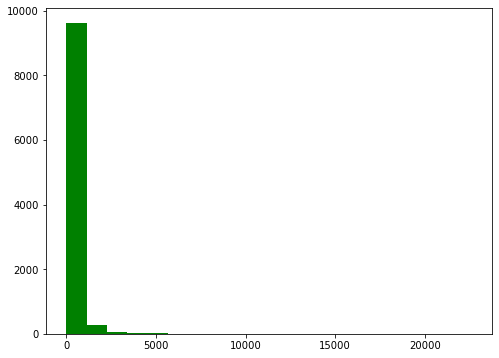

In [13]:
#Plot Histogram of Sales Variable

plt.figure(figsize=(8,6))
plt.hist(df.Sales,bins=20,color="g")
plt.show()

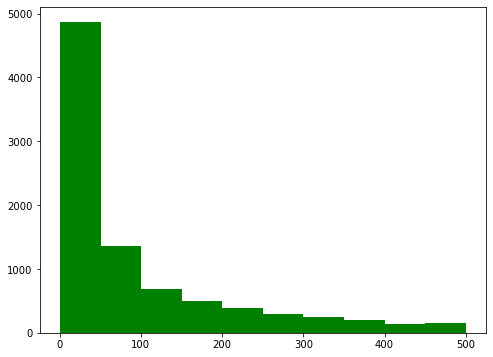

In [14]:
#Plot Histogram of Sales values less than 500 

plt.figure(figsize=(8,6))
plt.hist(df[df.Sales<500].Sales,color="g")
plt.show()

- Mostly sales are in range of 0-500

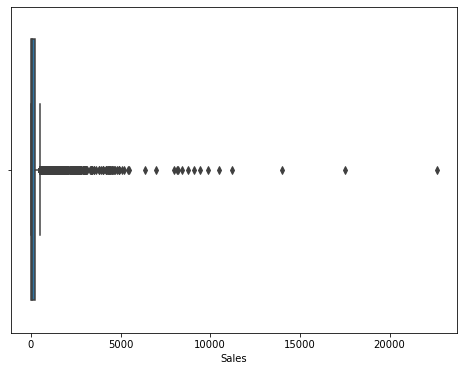

In [15]:
#plot the boxplot of Sales variable.

plt.figure(figsize=(8,6))
sns.boxplot(df.Sales)
plt.show()

In [16]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of Sales variable

df.Sales.quantile([.5,.7,.9,.95,.99])

0.50      54.490000
0.70     158.376000
0.90     572.706000
0.95     956.984245
0.99    2481.694600
Name: Sales, dtype: float64

- 90 % values in sales variable are less than 572, which we already saw in histogram most values are less than 500

In [17]:
# Describe the Profit variable in df

df.Profit.describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

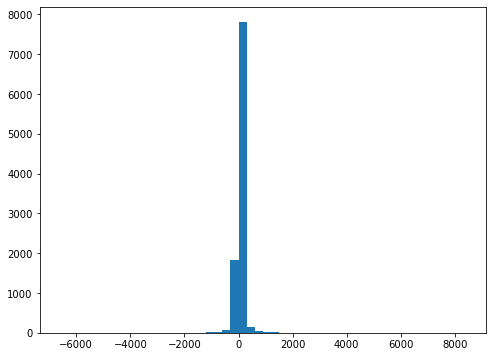

In [18]:
# Plot Histogram of Profit Variable

plt.figure(figsize=(8,6))
plt.hist(df.Profit,bins=50)
plt.show()

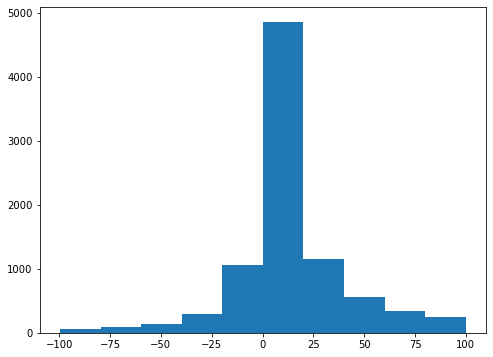

In [19]:
#Plot Histogram of Profit less than 500 and greater than -500

plt.figure(figsize=(8,6))
plt.hist(df[(df.Profit <100) & (df.Profit >-100)].Profit)
plt.show()

- Mostly Profit values are in range of -100 to 100

In [20]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of Sales variable

df.Profit.quantile([.5,.7,.9,.95,.99])

0.50      8.666500
0.70     22.200000
0.90     89.281620
0.95    168.470400
0.99    580.657882
Name: Profit, dtype: float64

In [21]:
# calculate the percentage of each Segment category. 

df.Segment.value_counts(normalize=True)

Consumer       0.519412
Corporate      0.302181
Home Office    0.178407
Name: Segment, dtype: float64

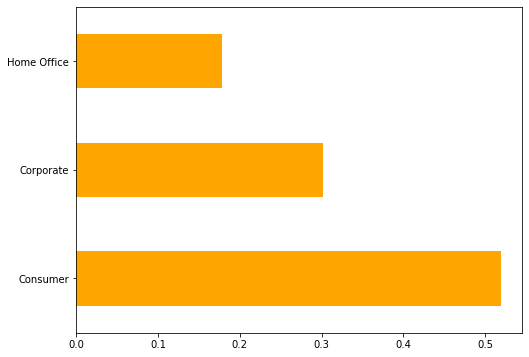

In [22]:
#plot the bar graph of percentage of each segment categories

plt.figure(figsize=(8,6))
df.Segment.value_counts(normalize=True).plot.barh(color="orange");

- `Consumer segment` values count is highest among three segments

#### Lets look at the product categories available to shop for customers

In [23]:
#calculate the percentage of each Product category 

df.Category.value_counts(normalize=True)

Office Supplies    0.602962
Furniture          0.212227
Technology         0.184811
Name: Category, dtype: float64

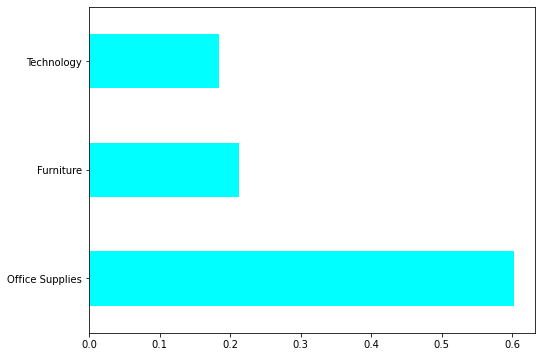

In [24]:
#plot the bar graph of percentage of each Product category 

plt.figure(figsize=(8,6))
df.Category.value_counts(normalize=True).plot.barh(color="cyan")
plt.show()

- Clearly we can see that, `office supplies` product category having the highest value count

In [25]:
#calculate the percentage of each Ship Mode.

df["Ship Mode"].value_counts(normalize=True)

Standard Class    0.597158
Second Class      0.194617
First Class       0.153892
Same Day          0.054333
Name: Ship Mode, dtype: float64

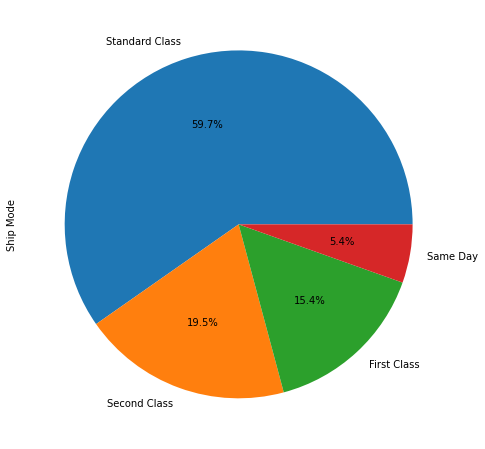

In [26]:
#plot the pie chart of Ship mode

plt.figure(figsize=(12,8))
df["Ship Mode"].value_counts(normalize=True).plot.pie(autopct="%1.1f%%")
plt.show()

- Clearly we can see that, `Standard class` value count is highest with 59.7% i.e it is most preferable ship mode

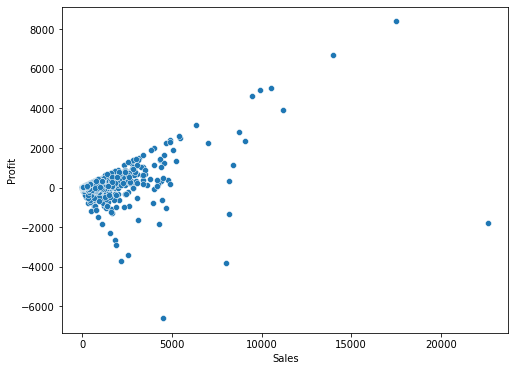

In [27]:
#plot the scatter plot of Sales and Profit variable in df

plt.figure(figsize=(8,6))
sns.scatterplot(df.Sales, df.Profit );

- Clearly we can see that there is no linear relationship between Sales and profit, this might be due to low margin in prdouct price

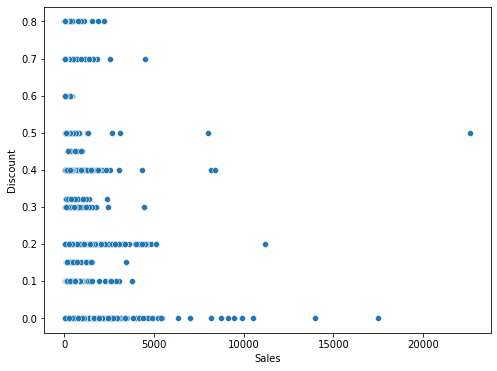

In [28]:
#plot the scatter plot of Sales and discount variable in df

plt.figure(figsize=(8,6))
sns.scatterplot(df.Sales, df.Discount );

- There is no linear relationship exist between sales and discount

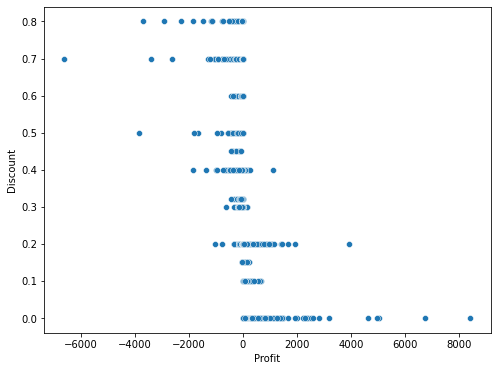

In [29]:
#plot the scatter plot of Profit  and Discount variable in df

plt.figure(figsize=(8,6))
sns.scatterplot(df.Profit, df.Discount );

- There is no linear relationship exist between Profit and discount as well

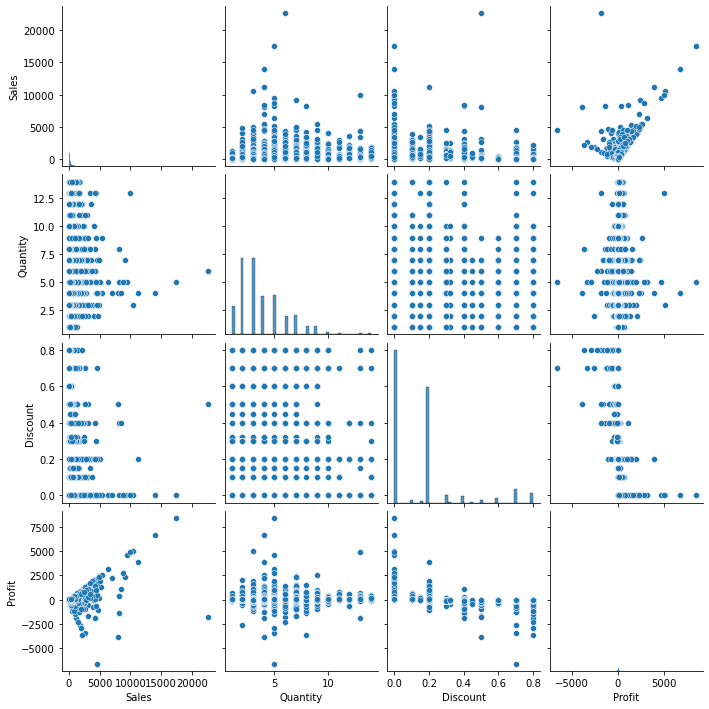

In [30]:
#plot the pair plot of Sales, Quantity, Discount and Profit in df dataframe.

sns.pairplot(data=df,vars=["Sales","Quantity","Discount","Profit"])
plt.show()

- By looking at the pairplot we can infer that there is `no linear relationship` among these variables.

In [31]:
#plot the correlation matrix of Sales, Quantity, Discount and Profit in df dataframe.

df[["Sales","Quantity","Discount","Profit"]].corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


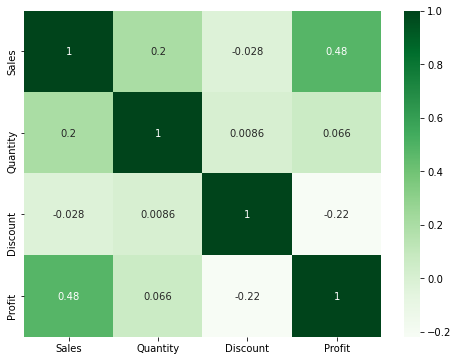

In [32]:
# Plot heat map of Sales, Quantity, Discount, Profit

plt.figure(figsize=(8,6))
sns.heatmap(df[["Sales","Quantity","Discount","Profit"]].corr(),annot=True,cmap="Greens")
plt.show()

- we can observe that correlation value is somewhat good for profit and sales otherwise very low for other varibles.

#### Lets again look at the product categories available to shop for customers

In [33]:
df.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [34]:
#groupby the Category of product to find the mean of the Sales.

df.groupby("Category")['Sales'].mean()

Category
Furniture          349.834887
Office Supplies    119.324101
Technology         452.709276
Name: Sales, dtype: float64

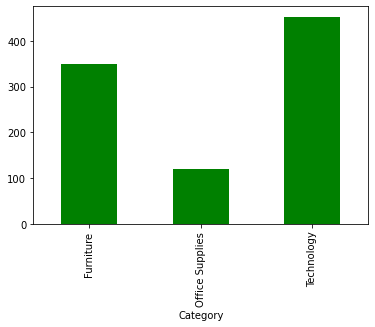

In [35]:
#plot the bar graph of Sales's mean with different Category of product.

df.groupby('Category').Sales.aggregate('mean').plot.bar(color="g")
plt.show()

 - From above plot we can infer that product category `Technology`  is having the highest mean Sale followed by `Furniture`.

In [36]:
#groupby the Category of product to find the mean of the Profit.

df.groupby("Category")['Profit'].mean()

Category
Furniture           8.699327
Office Supplies    20.327050
Technology         78.752002
Name: Profit, dtype: float64

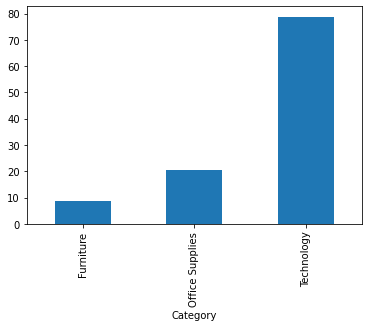

In [37]:
#plot the bar graph of Profit's mean with different Category of product.

df.groupby('Category').Profit.aggregate('mean').plot.bar()
plt.show()

- From above plot we can infer that product category `Technology`  is having the highest mean profit.

In [38]:
#groupby the Region to find the mean of the Sales.

df.groupby("Region")['Sales'].mean()

Region
Central    215.772661
East       238.336110
South      241.803645
West       226.493233
Name: Sales, dtype: float64

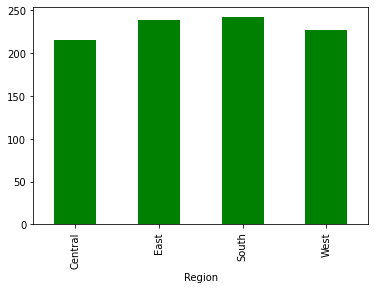

In [39]:
#plot the bar graph of Sales's mean and median for different Region.

df.groupby('Region').Sales.aggregate('mean').plot.bar(color="g")
plt.show()

- There is not that much difference between the mean sales for differnt regions. Though `East` and `South` are slightly better in Sales than remaining two.

In [40]:
#groupby the Region to find the mean of the Profit.

df.groupby("Region")['Profit'].mean()

Region
Central    17.092709
East       32.135808
South      28.857673
West       33.849032
Name: Profit, dtype: float64

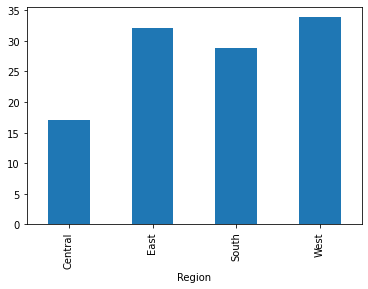

In [41]:
#plot the bar graph of Profit's mean for different Region.

df.groupby('Region').Profit.aggregate('mean').plot.bar()
plt.show()

In terms of Profit, `West` region is having the highest mean Profit followed by `East` region.

In [42]:
#groupby the Segment to find the mean of the Sales.

df.groupby("Segment")['Sales'].mean()

Segment
Consumer       223.733644
Corporate      233.823300
Home Office    240.972041
Name: Sales, dtype: float64

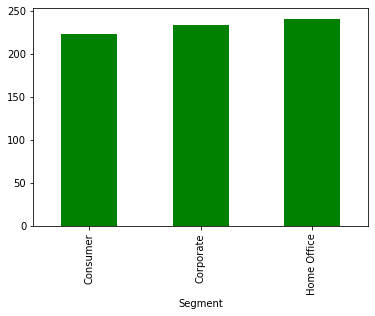

In [43]:
#plot the bar graph of Sales's mean for different Segments.

df.groupby('Segment').Sales.aggregate('mean').plot.bar(color="g")
plt.show()

- There is no such difference between the sales value of different segments.

In [44]:
#groupby the Segment to find the mean of the Profit.

df.groupby("Segment")['Profit'].mean()

Segment
Consumer       25.836873
Corporate      30.456667
Home Office    33.818664
Name: Profit, dtype: float64

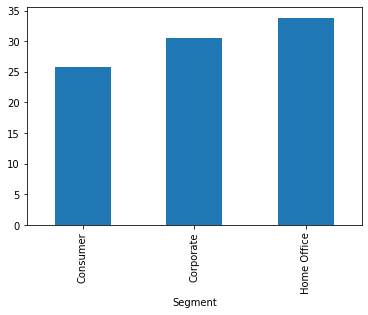

In [45]:
#plot the bar graph of Profit's mean for different Segments.

df.groupby('Segment').Profit.aggregate('mean').plot.bar()
plt.show()

- `Home office` is performing slightly better than other two segement in terms of profit.

In [46]:
#number of products in each category 

df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [47]:
# number of Sub-categories products are divided into.

df['Sub-Category'].nunique()

17

In [48]:
#number of products in each sub-category

df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

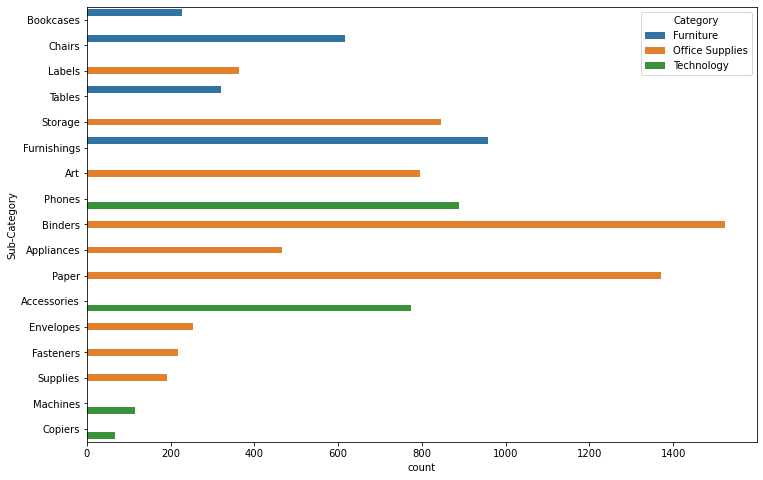

In [49]:
#Lets see how sub-categories are distributed wrt to category

plt.figure(figsize=(12,8))
sns.countplot(y="Sub-Category", hue="Category", data=df)
plt.show()

- From this graph, one can easily makeout which Category & Sub-Category to choose when they are looking to purchase a product

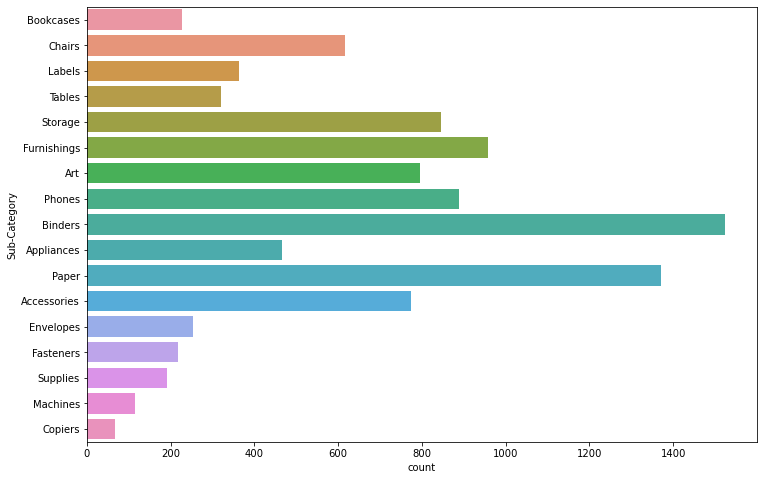

In [50]:
# Plot countplot for Sub-category

plt.figure(figsize=(12,8))
sns.countplot(y="Sub-Category", data=df)
plt.show()

- The store has wide variety of `Office Supplies` especially in `Binders and Paper` Sub-category.

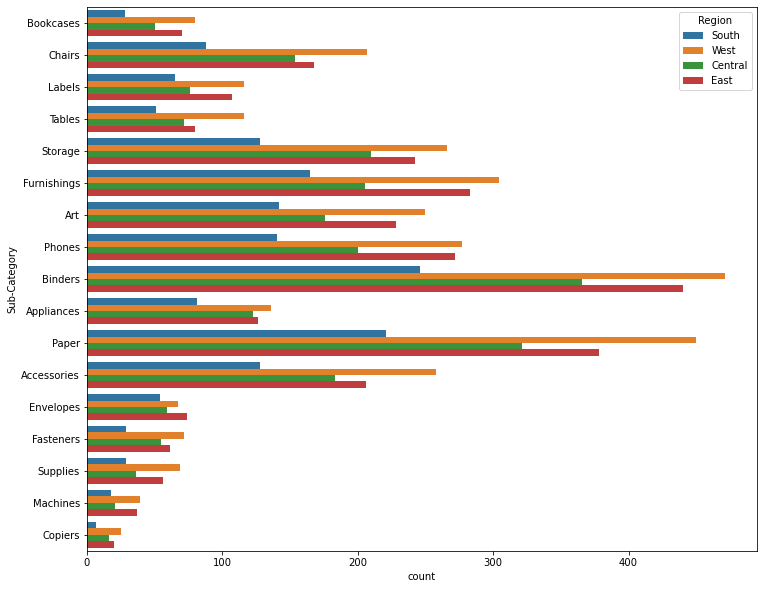

In [51]:
#Count of Sub-Category region wise


plt.figure(figsize=(12,10))
sns.countplot(y="Sub-Category", hue="Region", data=df)
plt.show()

- From above plot, it is clearly visible that stores has `Binders and papers` in high quantity in all the regions.
- `West region` is having the stores with high quantity of products followed by `East region`.

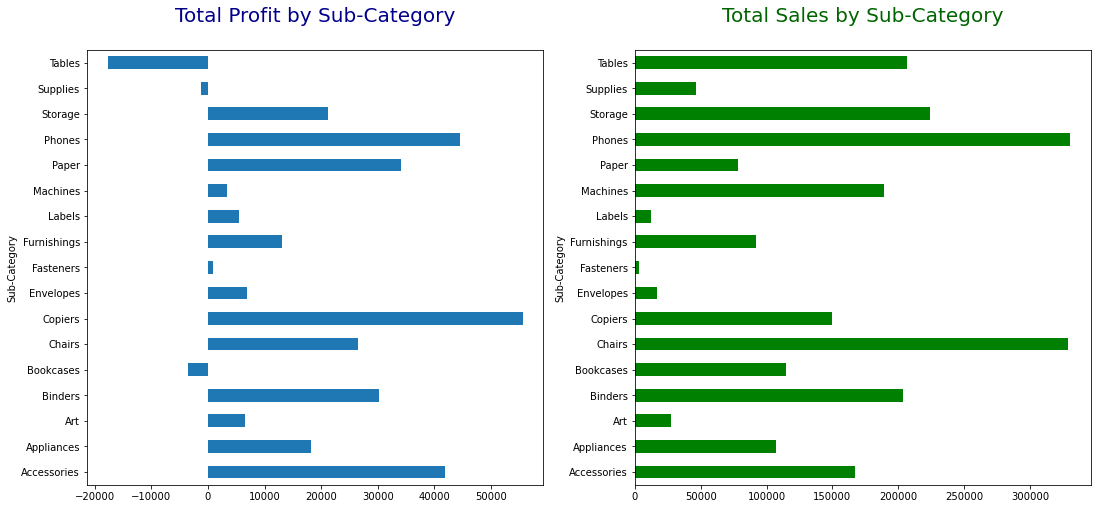

In [52]:
# Plot Total Sales and Total Profit for different Sub-Category

fig, ax =plt.subplots(1,2,figsize=[18,8])
df.groupby('Sub-Category')['Profit'].sum().plot.barh(ax=ax[0])
df.groupby('Sub-Category')['Sales'].sum().plot.barh(ax=ax[1],color="g")
ax[0].set_title('Total Profit by Sub-Category\n',fontsize=20,color="darkblue")
ax[1].set_title('Total Sales by Sub-Category\n',fontsize=20,color="darkgreen")
plt.show()

- Highest profit is earned for `Copiers` while Sales for `Chairs` and `Phones` is extremely high compared to other products. <br /><br />
- Also the `Phones` and `Accessories` are having the good profit and Sales as well. so we can focus on these products to meet the demand of customer thus we must increase the stock of these products.<br /><br />

- As `Copiers` is having the highest profit instead of average sales compare to other sub-Categories, we must market `Copiers` more to increase its sales. Also we must increase stock of `Copiers`.<br /><br />

- Another interesting fact - people dont prefer to buy `Tables` and `Bookcases` from Superstore. Hence these departments are in loss. Thus marketing team has to focus in marketing these products as they are least popular or they drop these products from store if customers are not much interested in buying these products.

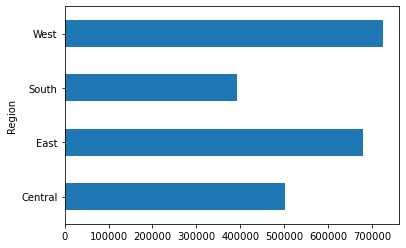

In [53]:
# plot the bar graph of Sales's sum for different Regions.

df.groupby(["Region"])["Sales"].sum().plot.barh()
plt.show()

- People residing in `Western` part of US tends to order more from superstore, followed by the people in `Eastern` part.

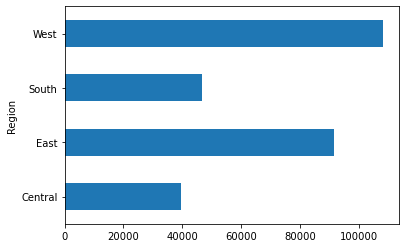

In [54]:
# plot the bar graph of Profit's sum for different Regions.

df.groupby(["Region"])["Profit"].sum().plot.barh()
plt.show()

- `West region` is having the highest profit among all four regions, followed by `East region` which is also having a good profit.

In [55]:
#create heat map of Region vs Category vs Sales

res1=pd.pivot_table(data=df,index='Region',columns='Category',values='Sales')
res1

Category,Furniture,Office Supplies,Technology
Region,,,
Central,340.534644,117.458801,405.753124
East,346.574383,120.044425,495.278469
South,353.309289,126.282727,507.753952
West,357.302325,116.422377,420.687533


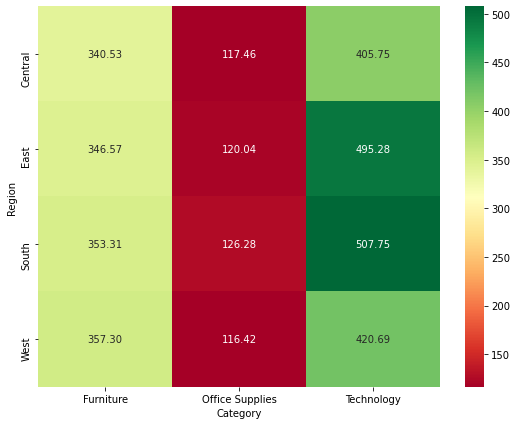

In [56]:
# Heat map for sales for Region and Category

plt.figure(figsize=(9,7))
sns.heatmap(res1,annot=True,cmap="RdYlGn",fmt=".2f")
plt.show()

- Sales of `technology` products is highest among all three categories which we already saw using barplot and now its cross checked here, Particulary in `South region` is highest followed by `East region`.<br /><br />
- `Office supplies` category having the lowest sales. These Products require a good marketing strategy to promote and market these products.

In [57]:
#create heat map of Region vs Category vs Profit   

res=pd.pivot_table(data=df,index='Region',columns='Category',values='Profit')
res

Category,Furniture,Office Supplies,Technology
Region,,,
Central,-5.968918,6.244712,80.231981
East,5.068496,23.957114,88.714084
South,20.395199,20.086827,68.231506
West,16.272914,27.733183,73.962687


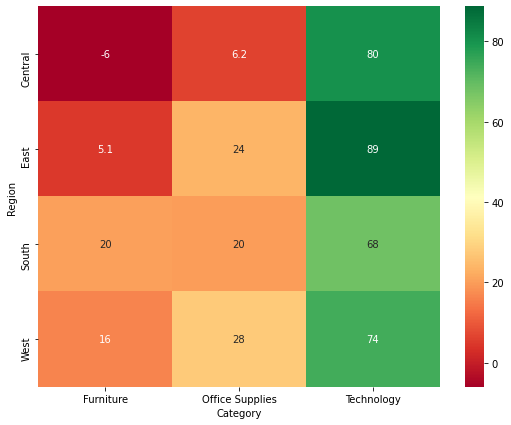

In [58]:
# Heat map for Profit for Region and Category

plt.figure(figsize=(9,7))
sns.heatmap(res,annot=True,cmap="RdYlGn")
plt.show()

- `Technology` category is having the highest mean profit which we already saw previously using bar plot, now it is cross checked here. <br /><br />
- While `East region` have highest profit in technology category followed by `central region`.

In [59]:
# Creat heatmap of Sub-category vs Region Vs Sales

res3=pd.pivot_table(data=df,index='Sub-Category',columns='Region',values='Sales')
res3

Region,Central,East,South,West
Sub-Category,,,,
Accessories,185.552328,218.608602,213.099641,236.876419
Appliances,191.723846,271.337032,241.053407,222.326000
Art,32.757614,32.832298,32.786070,36.848264
Binders,155.528093,121.586357,150.529841,118.813403
Bookcases,483.143536,625.990486,389.262929,450.051544
Chairs,553.445753,572.980256,513.368705,491.697237
Copiers,2328.723125,2660.973100,1328.536571,1989.969680
Envelopes,78.591051,59.133432,61.954741,61.464179
Fasteners,14.146000,13.438000,17.355724,12.822444


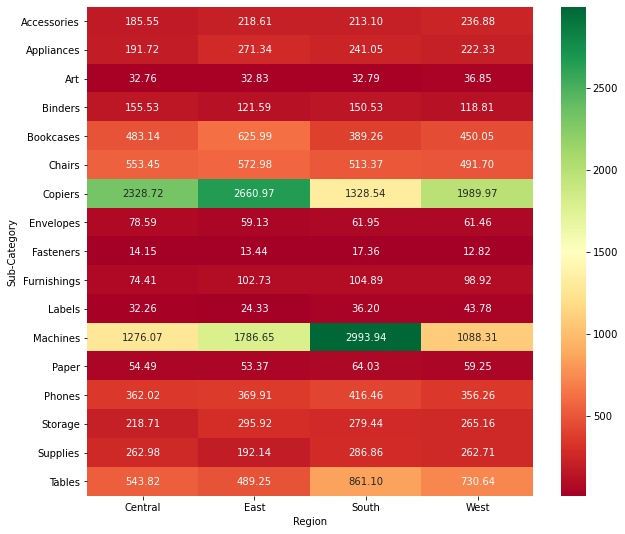

In [60]:
# Heatmap for Sales for sub-category and region

plt.figure(figsize=(10,9))
sns.heatmap(res3,annot=True,cmap="RdYlGn",fmt=".2f")
plt.show()

- `Copiers` is having the highest mean sales among all other Sub-Category, particulary in `East region` followed by `Central region`.<br /><br />
- Mostly `Office Supplies` category is having the low sale, thus we must focus on this category to increase its sales by a good marketing strategy.

In [61]:
# Creat heatmap of Sub-category vs Region Vs Profit

res2=pd.pivot_table(data=df,index='Sub-Category',columns='Region',values='Profit')
res2

Region,Central,East,South,West
Sub-Category,,,,
Accessories,39.626397,54.348856,54.722987,63.893792
Appliances,-21.452175,66.598519,50.912835,60.744632
Art,6.790677,8.333089,7.454835,9.496388
Binders,-2.851467,25.608942,15.856358,34.175800
Bookcases,-39.958086,-16.680454,47.838993,-20.581396
Chairs,42.809884,55.701015,75.137378,19.456929
Copiers,975.552581,851.142090,522.700957,773.089404
Envelopes,30.127598,24.492014,27.138463,28.488991
Fasteners,4.302156,4.327718,5.990279,3.822093


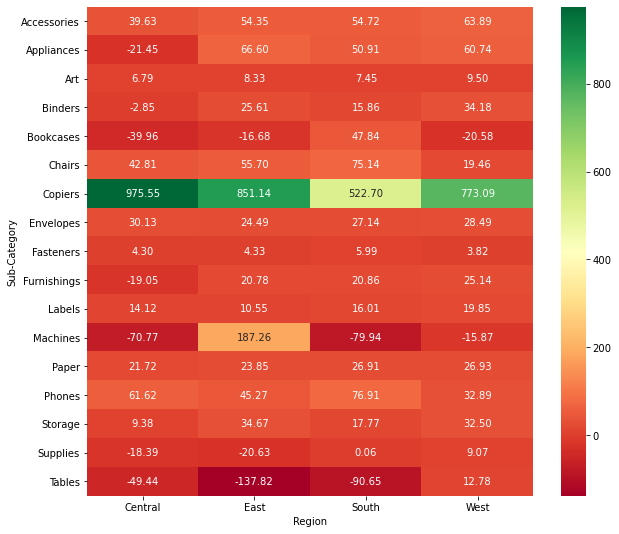

In [62]:
# Heatmap for Profit for sub-category and region

plt.figure(figsize=(10,9))
sns.heatmap(res2,annot=True,cmap="RdYlGn",fmt=".2f")
plt.show()

- It's clear from heatmap that `Copiers` having the highest Profit which we already saw using bar plot, particularly in `Central region` followed by `East region`<br /><br />
- `Tables and machines` are having the lowest profit among all the sub-catogries, so Marketing team have to plan a good marketing strategy to promote 